In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import torchxrayvision as xrv
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import to_categorical

In [3]:
new_img_height = 128
new_img_width = 128
channels = 3

# **DenseNet**

In [4]:
CLASS_NAMES= ['No Finding', 'COVID-19']

In [5]:
from sklearn.model_selection import train_test_split

In [12]:
train_x = np.load('train_x.npy')
train_label = np.load('train_label.npy')
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')
validation_x = np.load('validation_x.npy')
validation_label = np.load('validation_label.npy')

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
train_label.dtype

dtype('float16')

In [15]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [52]:
import efficientnet.tfkeras as efc

In [53]:
from tensorflow.keras.applications import *

In [54]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [92]:
model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    classes=2,
   # classifier_activation="softmax",
#    **kwargs
)

74842112/74836368 [==============================] - 27s 0us/step


In [93]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#4th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
new_model.add(tf.keras.layers.Dense(2))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


In [94]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 4, 4, 1920)        18321984  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          552992    
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 32)          128       
_________________________________________________________________
activation_8 (Activation)    (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 2, 2, 64)         

In [95]:
epochs = 50
num_classes = 2

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_label,epochs=epochs,verbose=1,validation_data=(validation_x, validation_label),shuffle=False)

Epoch 1/50
50/50 [==============================] - 35s 694ms/step - loss: 1.1603 - acc: 0.8223 - val_loss: 6.7951 - val_acc: 0.5139
Epoch 2/50
50/50 [==============================] - 23s 463ms/step - loss: 0.7813 - acc: 0.9231 - val_loss: 1.3020 - val_acc: 0.4861
Epoch 3/50
50/50 [==============================] - 23s 465ms/step - loss: 0.6091 - acc: 0.9200 - val_loss: 3.0235 - val_acc: 0.4861
Epoch 4/50
50/50 [==============================] - 23s 463ms/step - loss: 0.4499 - acc: 0.9408 - val_loss: 1.8531 - val_acc: 0.4861
Epoch 5/50
50/50 [==============================] - 23s 464ms/step - loss: 0.3218 - acc: 0.9622 - val_loss: 1.7152 - val_acc: 0.4861
Epoch 6/50
50/50 [==============================] - 23s 465ms/step - loss: 0.2576 - acc: 0.9653 - val_loss: 2.3842 - val_acc: 0.4861
Epoch 7/50
50/50 [==============================] - 23s 464ms/step - loss: 0.2063 - acc: 0.9735 - val_loss: 1.2339 - val_acc: 0.4861
Epoch 8/50
50/50 [==============================] - 23s 465ms/step - 

In [97]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

**Random Forest**

In [101]:
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')

In [102]:
new_model2 = keras.Model(inputs=new_model.input, outputs=new_model.get_layer('flatten_2').output)
featureVector = new_model2.predict(train_x)

In [104]:
featureVector2 = new_model2.predict(test_x)


In [106]:
print(featureVector.shape)

(1587, 64)


In [107]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(featureVector,train_label)

RandomForestClassifier()

In [110]:
test_x.shape

(497, 128, 128, 3)

In [111]:
y_pred=clf.predict(featureVector2)

In [112]:
featureVector.shape

(1587, 64)

In [115]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_label, y_pred))

Accuracy: 0.9839034205231388


In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

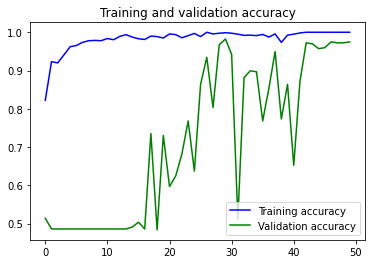

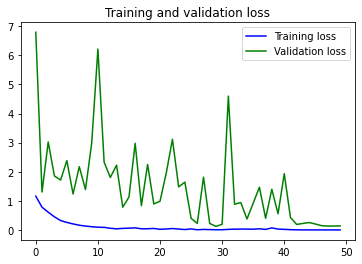

In [118]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [119]:
#avalia a fase de teste
model_loss, model_accuracy = new_model.evaluate(test_x, test_label, verbose=1)
#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

16/16 [==============================] - 2s 110ms/step - loss: 0.0657 - acc: 0.9819
Test loss: 0.06565152108669281
Test accuracy: 0.9818913340568542


In [120]:
#faz a predição das imagens
from tensorflow.keras.utils import to_categorical
pred = new_model.predict(test_x, verbose=0)
pred_probs = np.argmax(pred,axis=1)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [122]:
cm = confusion_matrix(test_label, pred_probs)

In [123]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_label, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.9818913480885313
Sensitivity: [0.97211155 0.99186992]
Specificity: [0.99186992 0.97211155]
Precision:   [0.99186992 0.97211155]
Accuracy:    [0.98189135 0.98189135]
